# Data Description

It is the data set that the cars are listed according to their features.

· mpg -> Miles driven by 1 gallon of gasoline (1 galon = 3.7 L , 1 mil = 1.6 Km)(9–46.6)

· cylinders -> The number of cylinders in the car (3–8)

· displacement -> Engine capacity (68–455)

· horsepower -> Horse power (46–230)

· weight -> Weight (1613–5140)

· acceleration -> Time to reach speed 0–100 km / h in seconds (8–24.8)

· model_year -> Car model year (1970–1982)

· origin -> Production place of the car

· name -> Model name of the car

# Data Load and Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
mpg["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [5]:
mpg["name"].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [6]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


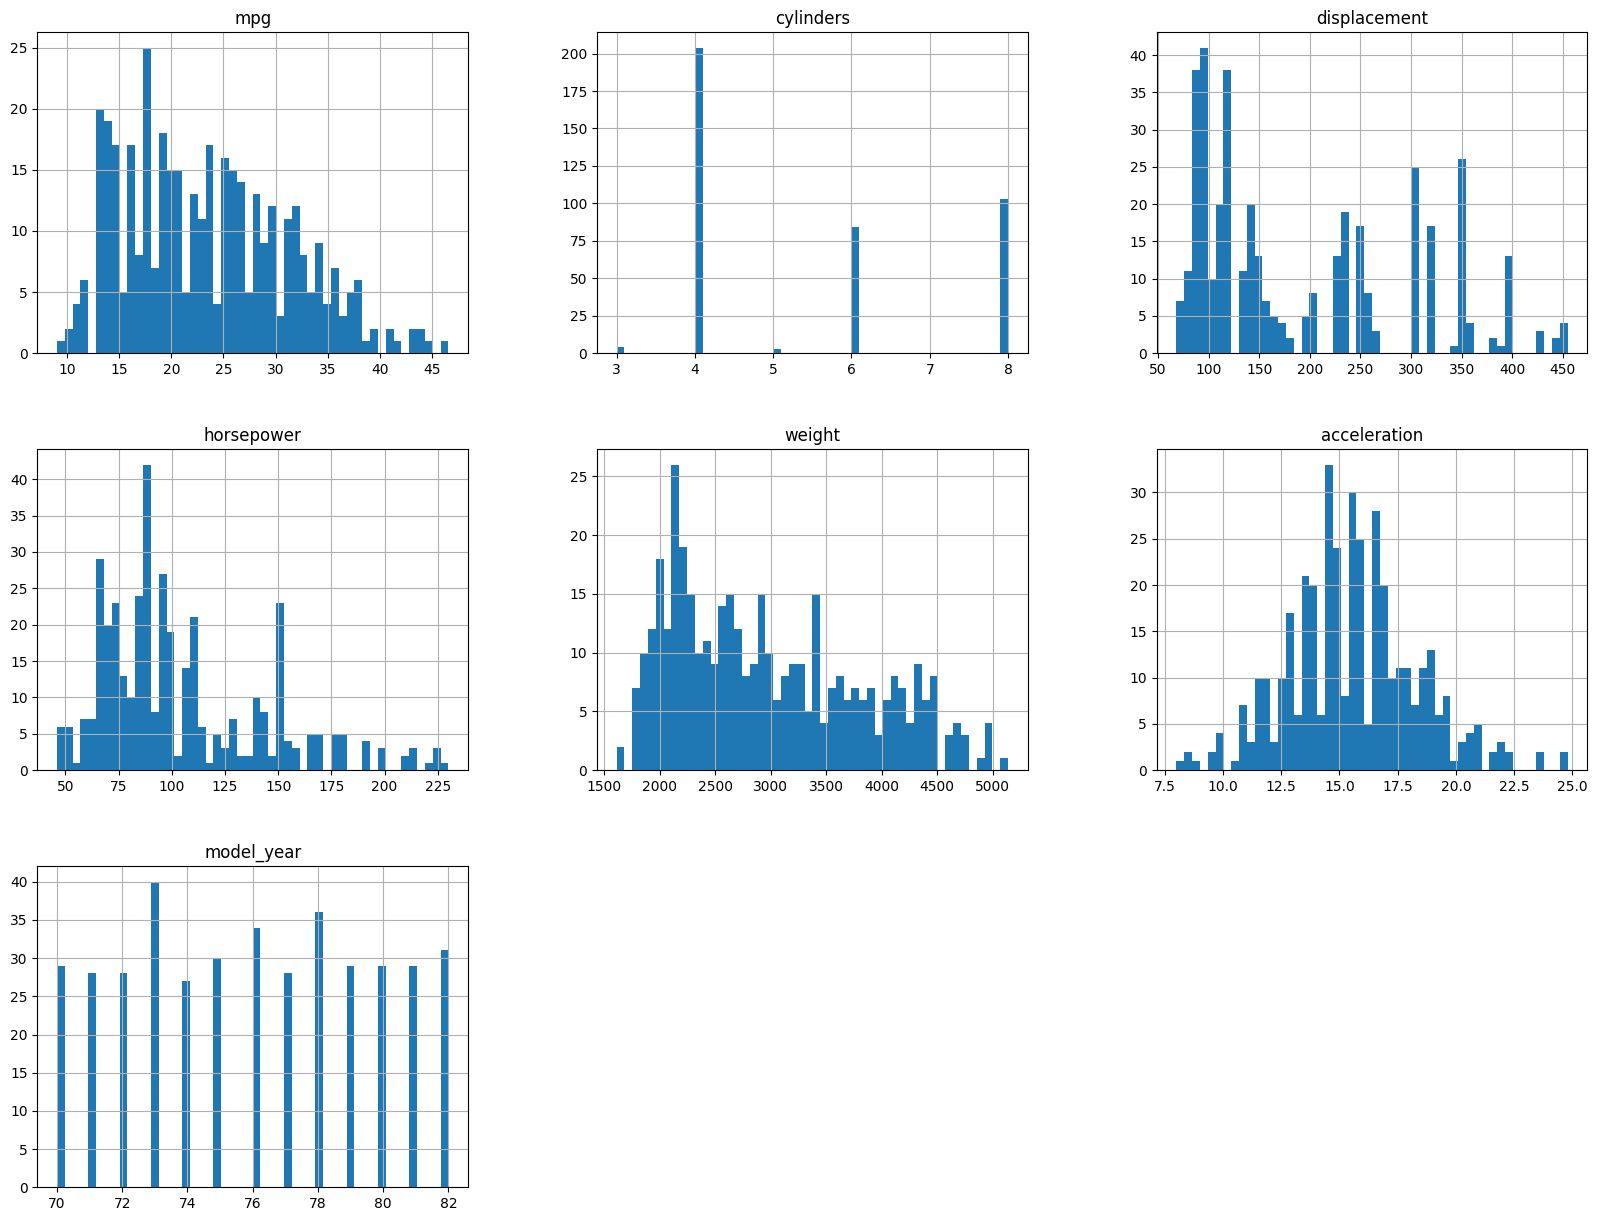

In [7]:
mpg.hist(bins = 50, figsize = (20,15))
plt.show()

# Create Test Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_data, test_data = train_test_split(mpg, test_size = .1, random_state = 0)

In [10]:
train_data.shape, test_data.shape

((358, 9), (40, 9))

# EDA
**Data exploration analysis should be performed on the training data set**

In [11]:
df = train_data.copy()

<Axes: xlabel='acceleration', ylabel='mpg'>

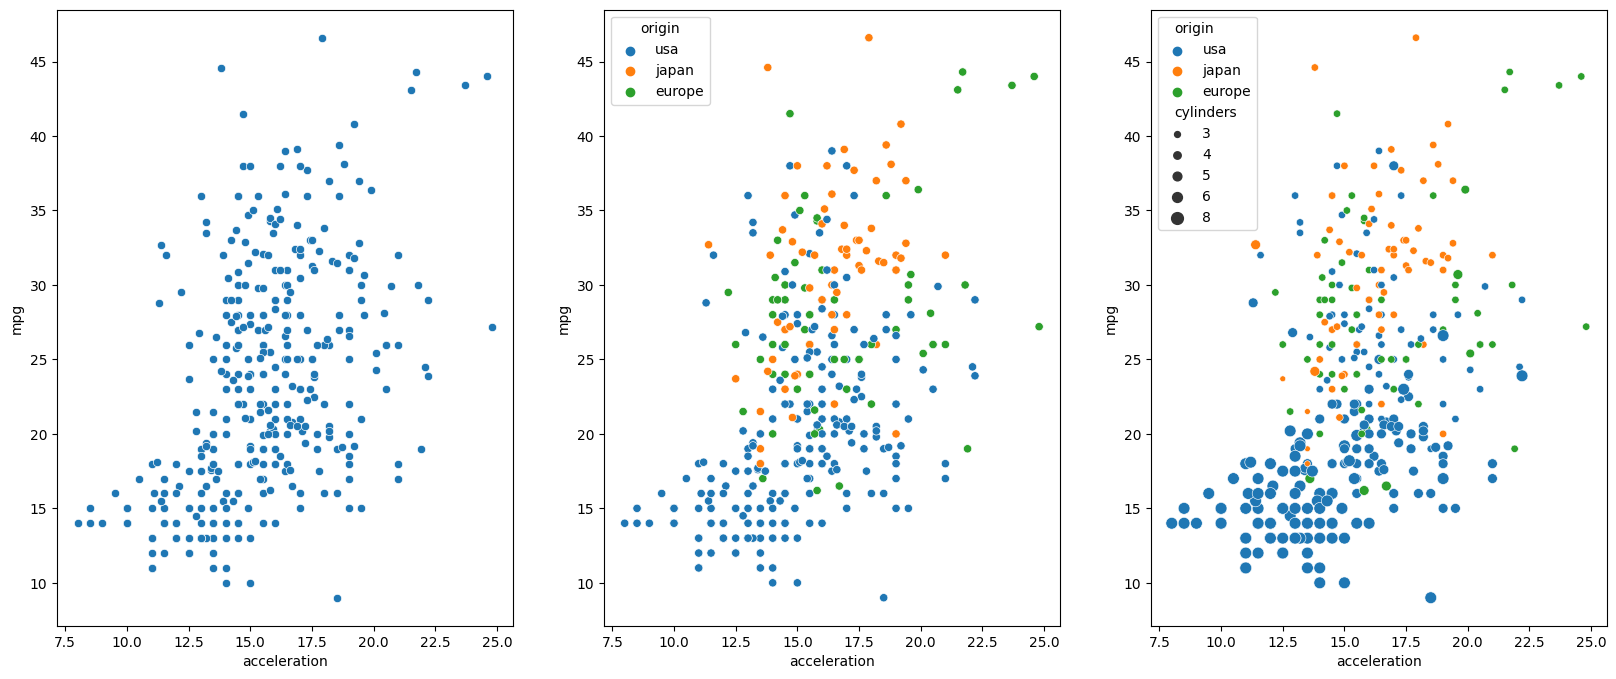

In [12]:
fig, ax = plt.subplots(figsize=(20,8), nrows = 1, ncols=3)
sns.scatterplot(data = df, x = "acceleration", y= "mpg", ax = ax[0])
sns.scatterplot(data = df, x = "acceleration", y= "mpg", hue = "origin", ax = ax[1])
sns.scatterplot(data = df, x = "acceleration", y= "mpg", hue = "origin", size="cylinders", ax = ax[2])

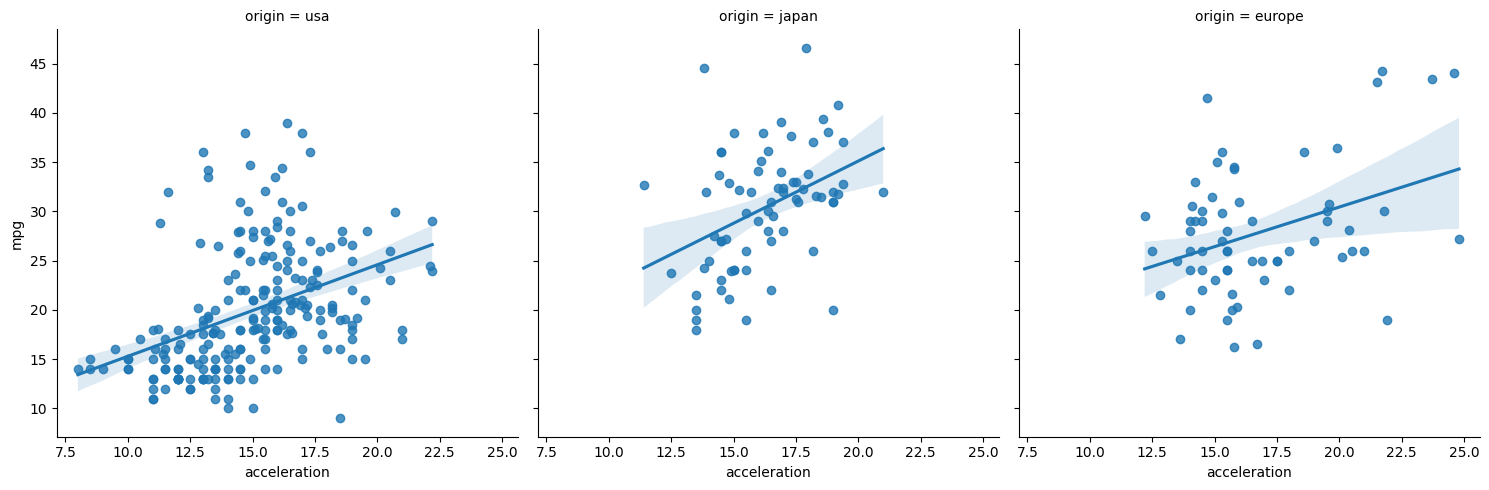

In [13]:
sns.lmplot(data = df, x = "acceleration", y= "mpg", col= "origin")

**There is a strong positive correlation between acceleration and mpg. In addition, when we look at the breakdown of categorical variables, it is seen that the acceleration and mpg values of USA origin cars are lower than Japanese and European cars.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

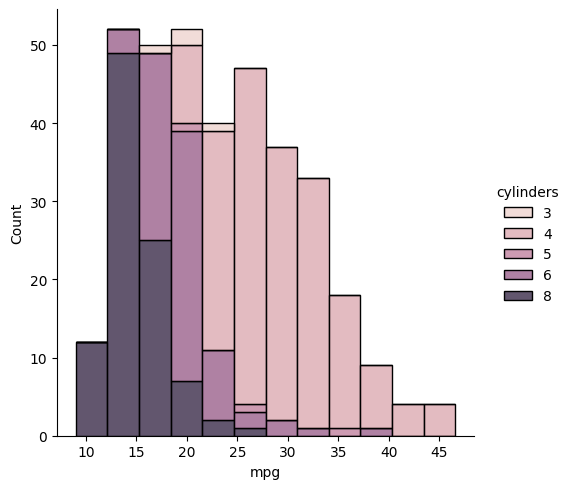

In [14]:
sns.displot(data = df, x = "mpg",hue= "cylinders", multiple = "stack")

**Vehicles with high mpg values have lower cylinder numbers**

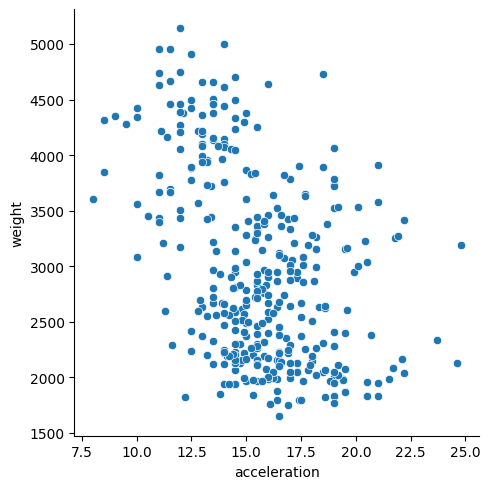

In [15]:
sns.relplot(data = df, x = "acceleration", y= "weight")

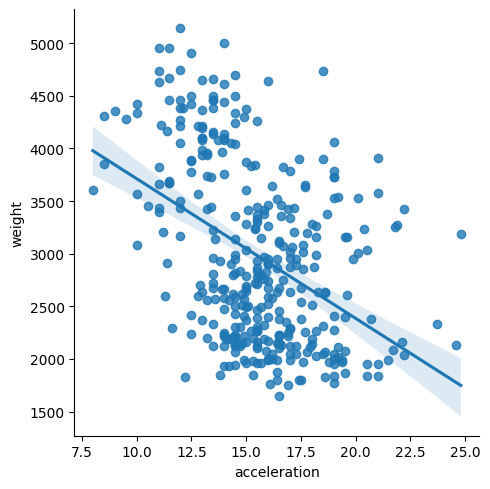

In [16]:
sns.lmplot(data = df, x = "acceleration", y= "weight")

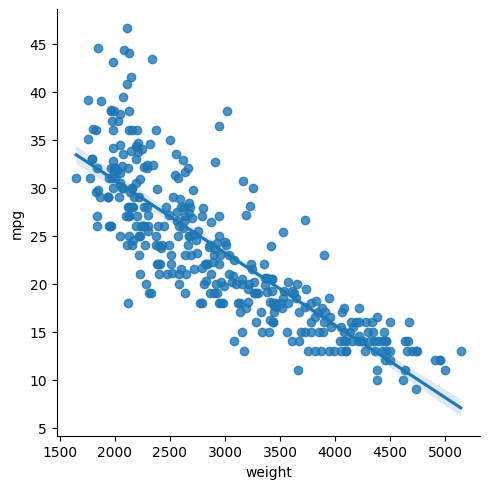

In [17]:
sns.lmplot(data = df, x = "weight", y= "mpg")

**As expected there is negative corelation between acceleration and weight and mpg and weight**

<Axes: xlabel='horsepower', ylabel='mpg'>

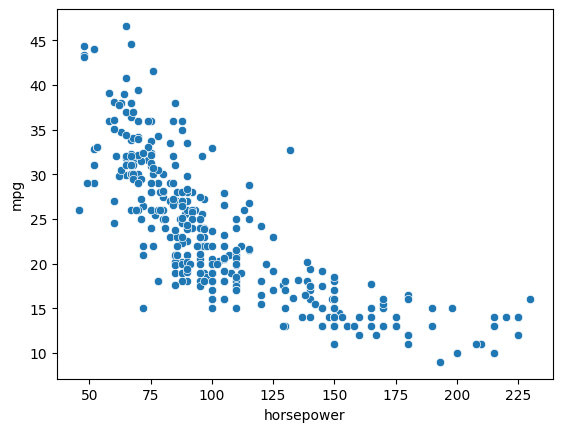

In [18]:
sns.scatterplot(data = df, x = "horsepower", y= "mpg")

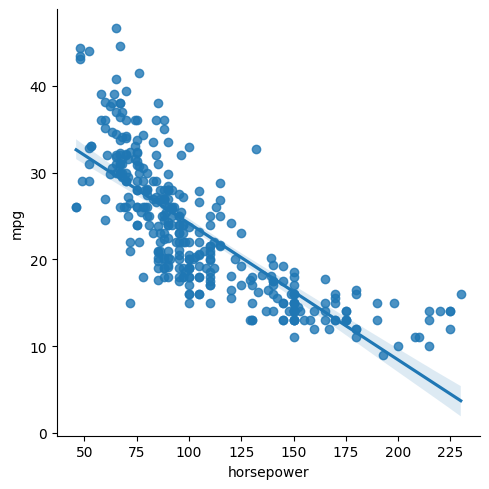

In [19]:
sns.lmplot(data = df, x = "horsepower", y= "mpg")

**there is negative corelation between horsepower and and mpg.**

<Axes: xlabel='displacement', ylabel='mpg'>

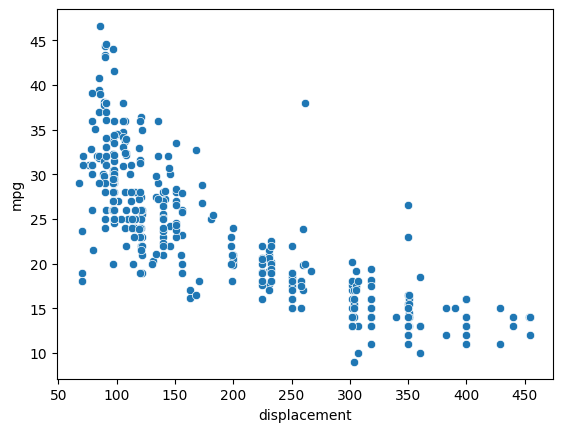

In [20]:
sns.scatterplot(data = df, x = "displacement", y= "mpg")

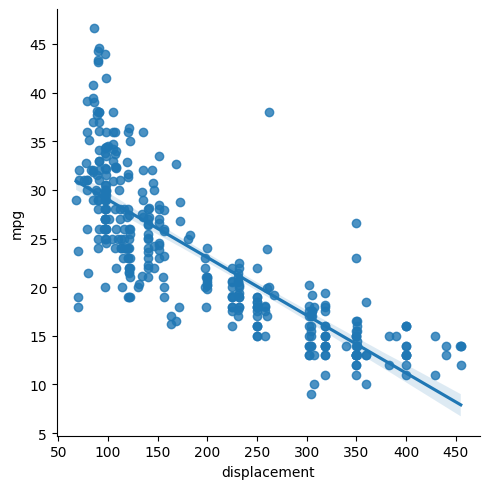

In [21]:
sns.lmplot(data = df, x = "displacement", y= "mpg")

In [22]:
# detect corr matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix["mpg"].sort_values(ascending = False)

mpg             1.000000
model_year      0.577225
acceleration    0.459003
cylinders      -0.776988
horsepower     -0.786729
displacement   -0.802969
weight         -0.826712
Name: mpg, dtype: float64

**We have statistically confirmed the correlation results we found from the graphic visuals. As a result, there is a strong negative correlation between mpg and other numerical variables except model year and acceleration.**

# Data Preparation

In [23]:
# split target feature
X = df.copy()
y = X.pop("mpg")

## Missing Values

In [24]:
# detect missing values
X.isnull().sum()

cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

**We have 3 options for missing observations**.

1- We can remove the missing observations.

2- We can extract the column where the deficiency is located.

3- We can fill in the missing observations.

Since the first two options will cause loss of information in the data, we can use the 3rd option.

In [25]:
# option 1 X.dropna(subset=["horse_power"])
# option 2 X.drop("horse_power", axis=1)

In [26]:
# option 3 filling missing values with median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [27]:
# split numeric features
X_num = X.select_dtypes(include =["int64", "float64"])

In [28]:
X_num_filled = imputer.fit_transform(X_num)

**The reason why we also apply the imputer to non-missing observations is that when our model is applied in real life, we cannot know that there will be no missing data other than horse power. It is therefore recommended to apply it to all data.**

In [29]:
X_num_filled = pd.DataFrame(X_num_filled, columns = X_num.columns, index = X_num.index)

In [30]:
# check missing values
X_num_filled.isnull().sum()


cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

# Categoric Features

**Since we have 2 categorical variables, let's first look at the frequency counts**

In [31]:
X[["origin", "name"]].nunique()

origin      3
name      280
dtype: int64

**Since the frequency of the Name variable is too high, let's remove it directly. However, if we do not want to remove it, we can make different applications with feature engineering methods. For example, we can divide it into two as model and brand, or we can encode it numerically with the M-Estimate Encoder method.**

In [32]:
X.drop("name", axis = 1, inplace = True)

In [33]:
X_cat = X[["origin"]]

**We can think of 2 options here. First, if there is a hierarchy between categorical variables, an ordinal encoder can be used. If there is no hierarchy, one hot encoder can be used. Here, let's use an ordinal encoder in data analysis because the models produced by some origins differ in the target variable**

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_cat_encoded = ordinal_encoder.fit_transform(X_cat)
X_cat_encoded[:10]

array([[2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.]])

In [35]:
# if you see categories
ordinal_encoder.categories_

[array(['europe', 'japan', 'usa'], dtype=object)]

In [36]:
# OPTION 2 One Hot Encoder

#from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# X_cat_1hot = cat_encoder.fit_transform(X_cat, sparse = False)
# X_cat_1hot

## Scaler and PipeLine

**If the numerical variables in your dataset are on different scales, you do not want your model to give more weight to some values and apply larger or smaller coefficients. In this case, you need to standardize the numerical data and you can use a min-max transformation or a standard scaler. However, it is important to note that scaling does not need to be applied to our target variable.You can read more about these scales in my article on Kaggle. I'll leave the link.**

https://www.kaggle.com/discussions/questions-and-answers/529881


**We can also apply all the transformations we apply with the pipeline in sklearn more easily and regularly. In this section, the above mentioned missing observation filling, categorical value transformation and scaler operations will be performed using pipeline.**

In [37]:
# Let's reload and allocate the data from the beginning for pipeline
X = df.copy()
y = X.pop("mpg")
X_num = X.select_dtypes(include =["int64", "float64"])

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ["origin"]
drop_attribs = ["name"]


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("dropped", "drop", drop_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)

In [39]:
X_prepared

array([[ 1.46858608,  2.48230464,  2.98062152, ..., -2.37109405,
        -1.61295698,  2.        ],
       [ 1.46858608,  1.48729292,  1.55700872, ..., -1.46292048,
        -1.61295698,  2.        ],
       [-0.86550411, -0.70364636, -0.64312016, ..., -0.19147749,
         0.82235108,  2.        ],
       ...,
       [-0.86550411, -1.21071964, -1.4455201 , ...,  1.44323493,
        -0.80118763,  0.        ],
       [ 0.30154098,  0.53055088, -0.12544277, ..., -0.19147749,
        -1.3423672 ,  2.        ],
       [-0.86550411, -1.00023639, -0.87607498, ...,  0.35342665,
        -0.26000806,  0.        ]])

# Models

# LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error
lin_reg_predicts = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(y, lin_reg_predicts)
np.sqrt(lin_mse)

3.3223175217387215

**The problem here is this. We trained the model and then we evaluated it on the same data set. This may cause bias in the model. For this reason, we can use cross_val_score. (Another solution is to use a part of the training dataset as a validation dataset. But we did not prefer this method in this dataset since our data is small). cross_val_score is a function that generates a cross-validated accuracy score for each data point of our dataset.**

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_prepared, y,
                         scoring="neg_mean_squared_error", cv=5, n_jobs = -1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

3.3948543280154544


## DecisionTree

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_prepared, y)

DecisionTreeRegressor(random_state=42)

In [44]:
tree_reg_predicts = tree_reg.predict(X_prepared)
tre_mse = mean_squared_error(y, tree_reg_predicts)
np.sqrt(tre_mse)

0.0

**As you can see, it came out 0. That doesn't mean the model is very good. Our model overfits the dataset. Therefore, let's apply cross_val_score to this model and see if the results are different.**

In [45]:
scores = cross_val_score(tree_reg, X_prepared, y,
                         scoring="neg_mean_squared_error", cv=5, n_jobs = -1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

3.8865963169616906


## RandomForest

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared, y)

RandomForestRegressor(random_state=42)

In [47]:
scores = cross_val_score(forest_reg, X_prepared, y,
                         scoring="neg_mean_squared_error", cv=5, n_jobs = -1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.8310117753000426


**We got the best results with our last model, which is a simple model. If the model is underfitting, it might be good to increase the complexity of the model, in which case we need to choose better hyperparameters. Now let's move on to model tuning where we will do these operations**

## Model Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs = -1)
grid_search.fit(X_prepared, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

**Now let's evaluate our best model on our test dataset.**

In [51]:
X_test = test_data.copy()
y_test = X_test.pop("mpg")

In [52]:
final_model = grid_search.best_estimator_
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.642265494692849

**It's a very good result. In real life problems, the test error is usually slightly higher than the training error. This is a normal situation. However, if the test error is much higher than the training error, this indicates that the model is overfitting.**